There are five algorithms that can be run.  

Non-spatial algorithms:
- "Branching". A branching process based on the single progenitor model from Clayton, Elizabeth, et al. "A single type of progenitor cell maintains normal epidermis." Nature 446.7132 (2007): 185-189.
- "Moran". A Moran-style model. At each simulation step, one cell dies and another cell divides, maintaining the overall population.  
- "WF". A Wright-Fisher style model. At each simulation step an entire generation of cells is produced from the previous generation.

2D algorithms:
- "Moran2D". A Moran-style model constrained to a 2D hexagonal grid. At each simulation step, one cell dies and a *cell from an adjacent location in the grid* divides.
- "WF2D". A Wright-Fisher style model constrained to a 2D hexagonal grid. At each simulation step an entire generation of cells is produced from the previous generation, where cell parents must be from the local neighbourhood in the grid.


In all of these models, there is a fixed division/generation rate. Fitness changes alter the cell fate (i.e. fitter cells produce more cells that will go on to divide).  

-----

This notebook gives a quick explanation of each algorithm. For a brief discussion of how the models compare in terms of the rate of drift and the patterns of non-neutral clone growth, see the introduction chapter of this thesis: https://www.repository.cam.ac.uk/handle/1810/333970   

This notebook also does not go into much detail on how to actually run the simulations.
See the other tutorial notebooks for guides to the parameter settings and functions used here. 

In [1]:
%matplotlib inline
import numpy as np
from clone_competition_simulation import Parameters

# Branching

This is based on the single progenitor model.   

Only proliferative cells are simulated. Differentiated cells in the basal layer can be accounted for by scaling the clone size distribution of profliferative cells only or by simulating the differentiated cells too (see the tutorial notebook on simulating differentiated cells).   

Cell fitness alters the cell fate bias. A fitness of 1 means an equal proportion of cell divisions and cell deaths, so the total size of the cell population remains constant on average.   
A lower fitness reduces the proportion of cell divisions and increases cell death, so the population size will decline.   
A higher fitness increases the proportion of cell divisions and decreases cell death, the population size will grow.   

This is the only algorithm in which the total cell population can vary.  

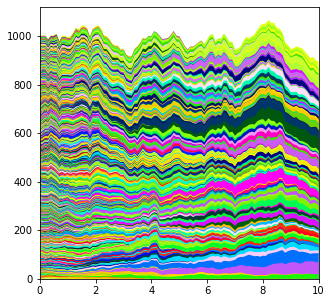

In [2]:
# Branching simulation starting from 1000 single-cell clones, all with fitness 1. 
p = Parameters(algorithm="Branching", initial_size_array=np.ones(1000), print_warnings=False)
s = p.get_simulator()
s.run_sim()
s.muller_plot(figsize=(5, 5), allow_y_extension=True);

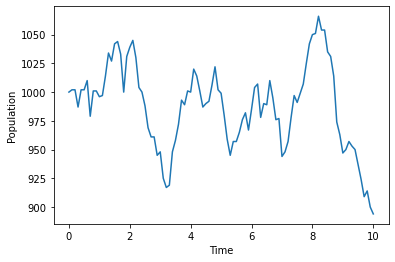

In [3]:
# This is the only algorithm where the total population varies. 
s.plot_overall_population()

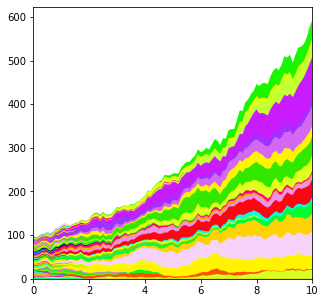

In [4]:
# There is no limit on population size. Fitness values above 1 will result in exponential growth. 
# Here, each of the initial single-cell clones has a fitness of 1.1
p = Parameters(algorithm="Branching", initial_size_array=np.ones(100), fitness_array=np.full(100, 1.1), 
               print_warnings=False)
s = p.get_simulator()
s.run_sim()
s.muller_plot(figsize=(5, 5), allow_y_extension=True);

The fitness values range between 0 (all cells die, none divide to form new cells) and 2 (all cells divide to form two new cells and no cells die). Any fitness values above 2 have the same effect as a fitness of 2.  

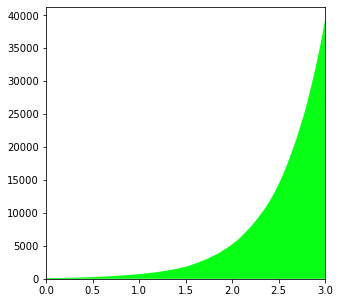

In [5]:
# A fitness of 2 leads to rapid growth
np.random.seed(0)
p = Parameters(algorithm="Branching", initial_cells=100, fitness_array=[2], max_time=3,
               print_warnings=False)
s = p.get_simulator()
s.run_sim()
s.muller_plot(figsize=(5, 5), allow_y_extension=True);

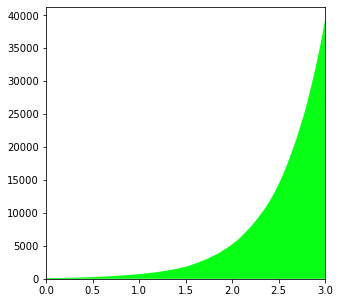

In [6]:
# Increasing the fitness further has no additional effect 
np.random.seed(0)
p = Parameters(algorithm="Branching", initial_cells=100, fitness_array=[100], max_time=3,
               print_warnings=False)
s2 = p.get_simulator()
s2.run_sim()
s2.muller_plot(figsize=(5, 5), allow_y_extension=True);

The unlimited population size means the simulations can grow very large, take inconveniently long times to finish and could use too much memory, especially if additional mutations are added during the simulations.   
There is an option to stop the simulations if the population ever exceeds a set limit.   
This does not limit the population in the sense of a carrying capacity, it just raises an error and stops the simulation early.  

In [7]:
p = Parameters(algorithm="Branching", initial_size_array=np.ones(100), fitness_array=np.full(100, 2), max_time=3,
               print_warnings=False, population_limit=30000)
s = p.get_simulator()
s.run_sim()

OverPopulationError: Ending early as population limit exceeded

# Moran 

At each step in this model one cell dies and another cell divides to replace it.    
The cells to die and divide are randomly selected at each step. One cell could divide many times before another has done anything. 

The higher a cell's fitness compared to the rest of the cell population, the more likely it is to divide.  
There is no upper limit on cell fitness.  

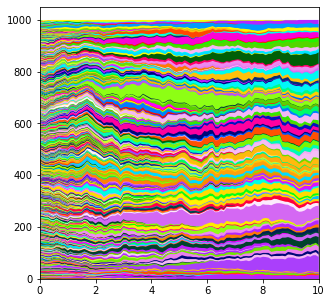

In [8]:
# Moran simulation starting from 1000 single-cell clones, all with fitness 1. 
# The total population size is fixed. 
p = Parameters(algorithm="Moran", initial_size_array=np.ones(1000), print_warnings=False)
s = p.get_simulator()
s.run_sim()
s.muller_plot(figsize=(5, 5), allow_y_extension=True);

# Wright-Fisher

At each step in this model, the entire population of cells is replaced.  
Each cell "picks a parent" from the previous generation at random.

The higher a cell's fitness compared to the rest of the cell population, the more likely it is to be picked to be a parent.  
There is no upper limit on cell fitness, and the only limit on the number of offspring a single cell can have in one generation is the total population size. 

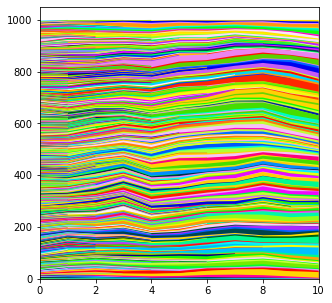

In [9]:
# Wright-Fisher simulation starting from 1000 single-cell clones, all with fitness 1. 
# The total population size is fixed. 
p = Parameters(algorithm="WF", initial_size_array=np.ones(1000), print_warnings=False)
s = p.get_simulator()
s.run_sim()
s.muller_plot(figsize=(5, 5), allow_y_extension=True);

# This plot looks less smooth than the Branching and Moran plots. 
# This is because the WF populations are only calculated once per generation, whereas the other algorithms can 
# update the populations as often as after every individual cell division. 

# 2D simulations: Moran2D and WF2D

The Moran2D and WF2D models are the Moran and WF models constrained to a 2D hexagonal grid with periodic boundary conditions. 

In the Moran2D, at each step a cell dies, and one of the neighbouring cells divides to fill the vacated space in the grid.   
In the WF2D, the parents of a cell are drawn from the immediate neighbourhood of the cell in the previous generation.   

/Users/mh28/PycharmProjects/clone-competition-simulation/clone_competition_simulation/animator.py:213: MatplotlibDeprecationWarning: 
The 'offset_position' parameter of __init__() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. If any parameter follows 'offset_position', they should be passed as keyword, not positionally.
  self.col = collections.PolyCollection(
/Users/mh28/PycharmProjects/clone-competition-simulation/clone_competition_simulation/animator.py:213: MatplotlibDeprecationWarning: 
The set_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self.col = collections.PolyCollection(
/Users/mh28/miniconda3/envs/competition_jup/lib/python3.8/site-packages/IPython/core/events.py:89: MatplotlibDeprecationWarning: Support for offset_position='data' is deprecated since 3.3 and will be removed two minor releases later.
  func(*args, **kwargs)
/Users/mh28/miniconda3/envs/competition_jup/lib/python3.8/s

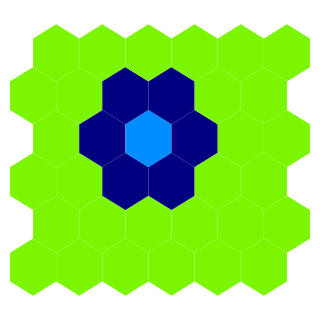

In [10]:
# A simulation on a small 6x6 grid. 
p = Parameters(algorithm='Moran2D', initial_cells=36, print_warnings=False)
s = p.get_simulator()


# Will colour a cell and its neighbourhood to show the hexagonal neighbours. 
np.random.seed(1)  # Set the random seed to make sure the random set of colours aren't too close to each other
row, col = 2, 3
s.grid[row, col] = 1
neighbours = s.get_neighbour_coords_2D(row, col)
s.grid[neighbours[:, 0], neighbours[:, 1]] = 2
s.plot_grid(grid=s.grid, figsize=(3, 3))

For the Moran process, it makes sense that the replacement cell comes from one of the 6 surrounding cells.  
In the Wright-Fisher, where the new cell comes from the previous generation, it is also reasonable to assume that the cell in the same grid location in the previous generation can divide to fill the space.  
To use this seven-cell neighourbourhood, use the option cell_in_own_neighbourhood=True.

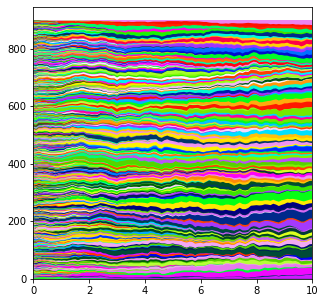

In [11]:
p = Parameters(algorithm="Moran2D", initial_grid=np.arange(30**2).reshape(30, 30), print_warnings=False)
s = p.get_simulator()
s.run_sim()
s.muller_plot(figsize=(5, 5), allow_y_extension=True);

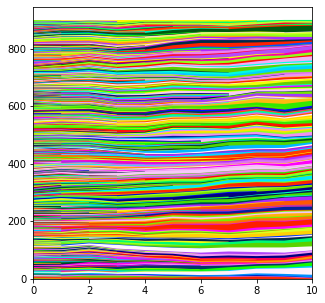

In [12]:
p = Parameters(algorithm="WF2D", initial_grid=np.arange(30**2).reshape(30, 30), print_warnings=False, 
              cell_in_own_neighbourhood=True)
s = p.get_simulator()
s.run_sim()
s.muller_plot(figsize=(5, 5), allow_y_extension=True);